In [56]:
import pandas as pd


In [63]:
forestdf = pd.read_csv('삼림.csv')
forestdf['삼림면적(km2)'] = forestdf['합계'] *1
forestdf.pop('합계')

forestdf = forestdf.sort_values(by=['구'], axis=0)

In [64]:
subterraneandf = pd.read_csv('구군별지하면적.csv')
subterraneandf['지하면적(100m2)'] = subterraneandf['지하면적'] //100
subterraneandf.pop('지하면적')

subterraneandf.sort_values(by=['구'], axis=0)




,구,지하면적(100m2)
0,강서구,25537.0
1,금정구,12460.0
2,기장군,27282.0
3,남구,57297.0
4,동구,7731.0
5,동래구,27495.0
6,부산진구,37234.0
7,북구,26563.0
8,사상구,12245.0
9,사하구,15979.0


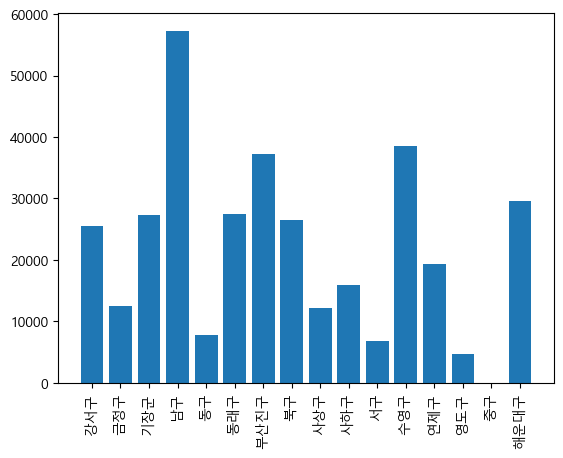

In [65]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

names = subterraneandf['구']
values = subterraneandf['지하면적(100m2)']

plt.bar(range(16), values, tick_label=names)
plt.xticks(rotation='vertical')
plt.show()

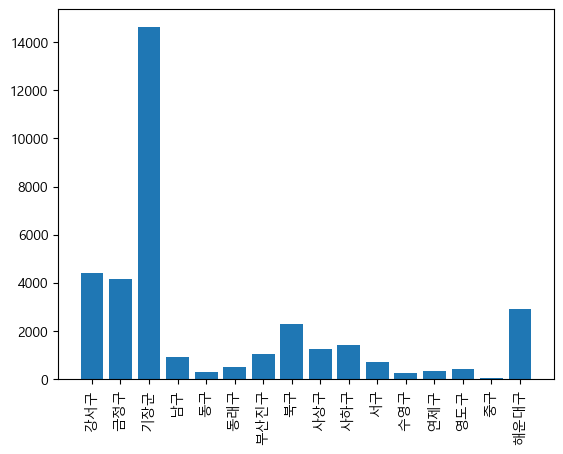

In [66]:
names = forestdf['구']
values = forestdf['삼림면적(km2)']

plt.bar(range(16), values, tick_label=names)
plt.xticks(rotation='vertical')
plt.show()